<a href="https://colab.research.google.com/github/anderson-dias/arquivos/blob/main/An%C3%A1lise_Forte_Coimbra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/anderson-dias/arquivos/main/nivel_forte_coimbra.csv')

In [ ]:
df.head()

,Data,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,01/07/2021,32.0,30.0,28.0,26.0,24.0,22.0,19.0,18.0,17.0,15.0,13.0,12.0,11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0,4.0,3.0,-2.0,-9.0,-11.0,-14.0,-16.0,-18.0,-21.0,-21.0,-23.0
1,01/06/2021,34.0,32.0,32.0,32.0,31.0,31.0,30.0,28.0,28.0,29.0,32.0,34.0,34.0,36.0,35.0,38.0,39.0,40.0,44.0,44.0,45.0,45.0,46.0,45.0,44.0,42.0,40.0,38.0,37.0,34.0,NaN
2,01/05/2021,83.0,82.0,78.0,76.0,74.0,74.0,73.0,72.0,71.0,69.0,66.0,65.0,62.0,60.0,59.0,57.0,55.0,53.0,52.0,50.0,48.0,46.0,45.0,43.0,42.0,42.0,42.0,40.0,40.0,38.0,37.0
3,01/04/2021,118.0,118.0,118.0,118.0,118.0,114.0,114.0,114.0,113.0,112.0,112.0,112.0,112.0,110.0,110.0,108.0,106.0,106.0,104.0,102.0,100.0,98.0,97.0,95.0,93.0,92.0,90.0,88.0,86.0,85.0,NaN
4,01/03/2021,58.0,61.0,63.0,65.0,68.0,73.0,75.0,79.0,83.0,85.0,90.0,94.0,96.0,99.0,100.0,102.0,104.0,105.0,107.0,109.0,111.0,113.0,116.0,117.0,118.0,118.0,119.0,120.0,120.0,121.0,121.0


In [ ]:
df.Data = pd.to_datetime(df.Data, format="%d/%m/%Y")

In [ ]:
df.index = df.Data

In [ ]:
df.head()

,Data,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-07-01,2021-07-01,32.0,30.0,28.0,26.0,24.0,22.0,19.0,18.0,17.0,15.0,13.0,12.0,11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0,4.0,3.0,-2.0,-9.0,-11.0,-14.0,-16.0,-18.0,-21.0,-21.0,-23.0
2021-06-01,2021-06-01,34.0,32.0,32.0,32.0,31.0,31.0,30.0,28.0,28.0,29.0,32.0,34.0,34.0,36.0,35.0,38.0,39.0,40.0,44.0,44.0,45.0,45.0,46.0,45.0,44.0,42.0,40.0,38.0,37.0,34.0,NaN
2021-05-01,2021-05-01,83.0,82.0,78.0,76.0,74.0,74.0,73.0,72.0,71.0,69.0,66.0,65.0,62.0,60.0,59.0,57.0,55.0,53.0,52.0,50.0,48.0,46.0,45.0,43.0,42.0,42.0,42.0,40.0,40.0,38.0,37.0
2021-04-01,2021-04-01,118.0,118.0,118.0,118.0,118.0,114.0,114.0,114.0,113.0,112.0,112.0,112.0,112.0,110.0,110.0,108.0,106.0,106.0,104.0,102.0,100.0,98.0,97.0,95.0,93.0,92.0,90.0,88.0,86.0,85.0,NaN
2021-03-01,2021-03-01,58.0,61.0,63.0,65.0,68.0,73.0,75.0,79.0,83.0,85.0,90.0,94.0,96.0,99.0,100.0,102.0,104.0,105.0,107.0,109.0,111.0,113.0,116.0,117.0,118.0,118.0,119.0,120.0,120.0,121.0,121.0


In [ ]:
df['month'] = df.Data.dt.month
df['year'] = df.Data.dt.year

In [ ]:
df.head()

,Data,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,month,year
Data,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-07-01,2021-07-01,32.0,30.0,28.0,26.0,24.0,22.0,19.0,18.0,17.0,15.0,13.0,12.0,11.0,10.0,9.0,8.0,7.0,6.0,5.0,4.0,4.0,3.0,-2.0,-9.0,-11.0,-14.0,-16.0,-18.0,-21.0,-21.0,-23.0,7,2021
2021-06-01,2021-06-01,34.0,32.0,32.0,32.0,31.0,31.0,30.0,28.0,28.0,29.0,32.0,34.0,34.0,36.0,35.0,38.0,39.0,40.0,44.0,44.0,45.0,45.0,46.0,45.0,44.0,42.0,40.0,38.0,37.0,34.0,NaN,6,2021
2021-05-01,2021-05-01,83.0,82.0,78.0,76.0,74.0,74.0,73.0,72.0,71.0,69.0,66.0,65.0,62.0,60.0,59.0,57.0,55.0,53.0,52.0,50.0,48.0,46.0,45.0,43.0,42.0,42.0,42.0,40.0,40.0,38.0,37.0,5,2021
2021-04-01,2021-04-01,118.0,118.0,118.0,118.0,118.0,114.0,114.0,114.0,113.0,112.0,112.0,112.0,112.0,110.0,110.0,108.0,106.0,106.0,104.0,102.0,100.0,98.0,97.0,95.0,93.0,92.0,90.0,88.0,86.0,85.0,NaN,4,2021
2021-03-01,2021-03-01,58.0,61.0,63.0,65.0,68.0,73.0,75.0,79.0,83.0,85.0,90.0,94.0,96.0,99.0,100.0,102.0,104.0,105.0,107.0,109.0,111.0,113.0,116.0,117.0,118.0,118.0,119.0,120.0,120.0,121.0,121.0,3,2021


In [ ]:
df = df.drop(columns=['Data'])

In [ ]:
df_n = df.melt(id_vars=["month", "year"], 
        var_name="day", 
        value_name="Nivel")

In [ ]:
df_n.head()

,month,year,day,Nivel
0,7,2021,1,32.0
1,6,2021,1,34.0
2,5,2021,1,83.0
3,4,2021,1,118.0
4,3,2021,1,58.0


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


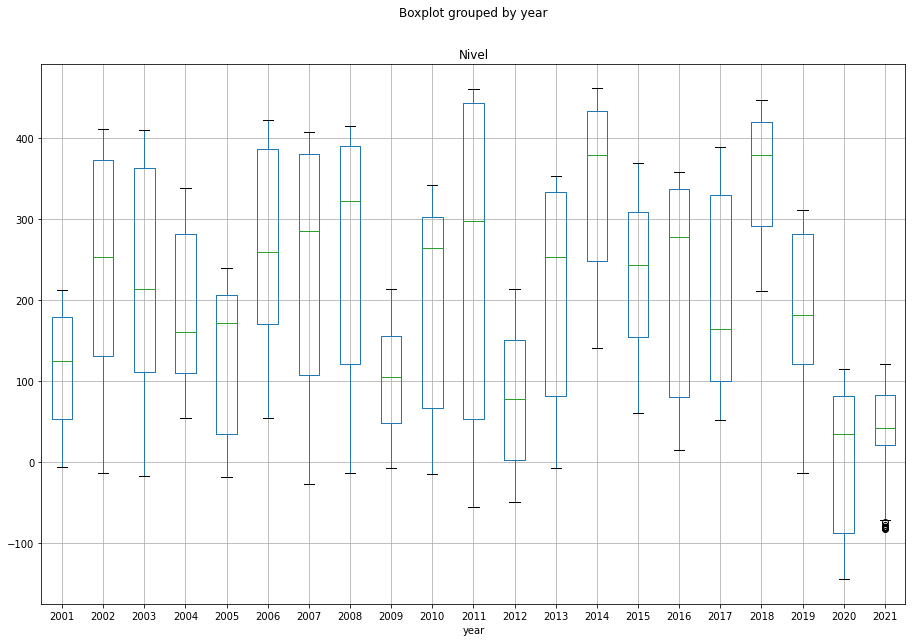

In [ ]:
df_n.boxplot(column="Nivel", by="year", figsize=(15,10));

# **Calculando o novo NR da estação Forte Coimbra**
Para rios sem influência de maré o nível de referência é calculado pelo método do percentil 6. Ou seja, o valor do NR é equivalente ao nível de água relativo ao 6% dos menores níveis observados na estação no período considerado.


> No período de janeiro de 2001 a julho de 2021, o percentil 6 de Forte Coimbra é ***-3,0 cm***.

In [ ]:
df_n.Nivel.quantile(0.06)

-3.0